In [1]:
from ldm.data.image_vitonhd import OpenImageDataset
import torch
import matplotlib.pyplot as plt

dataset = OpenImageDataset(state="train", dataset_dir=r"D:\Capstone_Project\datasets\vitonhd", type="paired")

In [2]:
def plot_tensor_as_image(tensor: torch.tensor):
    if tensor.ndim == 4:
        tensor = tensor[0]

    if tensor.ndim == 3:
        tensor = tensor.permute(1, 2, 0) #H, W, c
        tensor = tensor[:, :, -3:]

    np_img = tensor.numpy()
    plt.imshow(np_img)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


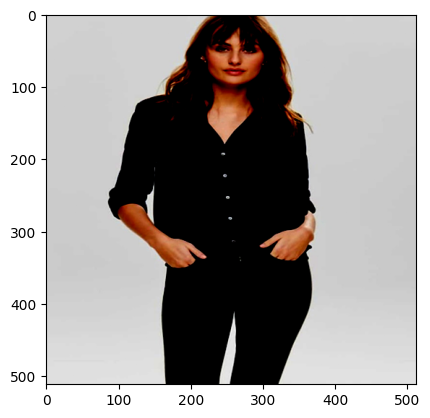

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  GT: None


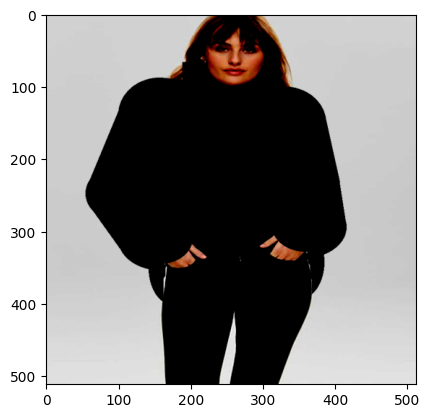

  inpaint_image: None


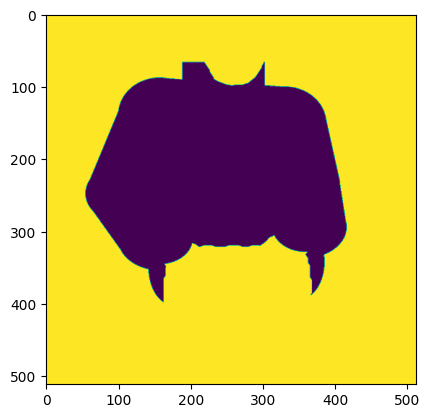

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  inpaint_mask: None


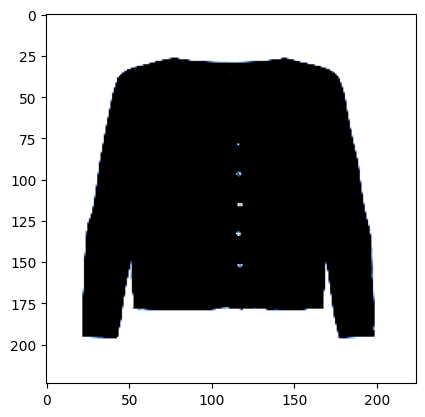

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  ref_imgs: None


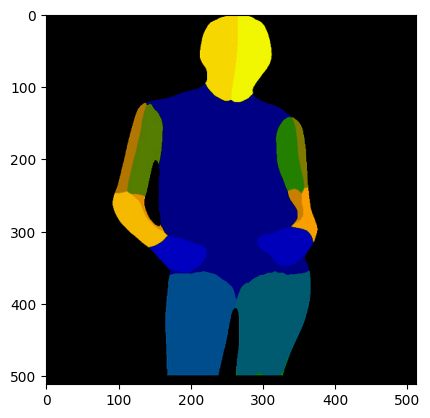

  hint: None
----------------------------------------------------------------------------------------------------
  a photo of Long Sleeve V Neck Cardigan 
----------------------------------------------------------------------------------------------------


In [5]:
for i in range(min(1, len(dataset))):
    item = dataset[i]
    print(f"  GT: {plot_tensor_as_image(item['GT'])}")
    print(f"  inpaint_image: {plot_tensor_as_image(item['inpaint_image'])}")
    print(f"  inpaint_mask: {plot_tensor_as_image(item['inpaint_mask'])}")
    print(f"  ref_imgs: {plot_tensor_as_image(item['ref_imgs'])}")
    print(f"  hint: {plot_tensor_as_image(item['hint'])}")
    print("-" * 100)
    print(f"  {item['caption_cloth']}")
    print("-" * 100)

In [ ]:
# print(dataset.annotations_pair)

In [14]:
from ldm.models.autoencoder import AutoencoderKL
from ldm.data.image_vitonhd import OpenImageDataset
import torch
from omegaconf import OmegaConf

config = OmegaConf.load(r"configs/train_vitonhd.yaml")
first_stage_config = config.model.params.first_stage_config
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


VAE = AutoencoderKL(
    embed_dim=first_stage_config.params.embed_dim,
    monitor=first_stage_config.params.monitor,
    ddconfig=first_stage_config.params.ddconfig,
    lossconfig=first_stage_config.params.lossconfig
)

dataset = OpenImageDataset(state="train",
                        dataset_dir=r"D:\Capstone_Project\datasets\vitonhd",
                        type="paired")

for i in range(min(1, len(dataset))):
    item = dataset[i]
    item["GT"]=item["GT"].unsqueeze(0)
    item["inpaint_image"]=item["inpaint_image"].unsqueeze(0)
    print(VAE.encode(item["GT"]))
    print(VAE.encode(item["inpaint_image"]))
    
    encoded_GT = VAE.encode(item["GT"])
    encoded_inpaint_image = VAE.encode(item["inpaint_image"])

    mean_GT, var_GT = encoded_GT.mean, encoded_GT.var
    mean_inpaint_image, var_inpaint_image = encoded_inpaint_image.mean, encoded_inpaint_image.var

    # print("Mean of encoded GT:", mean_GT.shape, mean_GT)
    # print("Variance of encoded GT:", var_GT.shape, var_GT)
    # print("Mean of encoded inpaint_image:", mean_inpaint_image.shape, mean_inpaint_image)
    # print("Variance of encoded inpaint_image:", var_inpaint_image.shape, var_inpaint_image)
    print(encoded_GT.sample().shape, encoded_GT.sample())
    print(encoded_inpaint_image.sample().shape, encoded_inpaint_image.sample())

making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
torch.Size([1, 4, 64, 64]) tensor([[[[-0.4946, -1.0804,  0.3362,  ..., -0.8115,  1.2447,  0.0800],
          [-0.8979, -0.5830, -1.6658,  ...,  1.3842, -1.2251, -0.6782],
          [ 0.7846, -0.1359, -0.6506,  ...,  0.6626, -2.0551, -2.9057],
          ...,
          [-0.4764, -0.7010, -0.9336,  ...,  0.8252, -1.4155,  1.5626],
          [ 1.0820, -2.0831,  0.0685,  ..., -0.9926, -1.1592, -0.7626],
          [-0.9318,  0.0307,  1.9856,  ..., -3.0376,  2.2294, -0.3109]],

         [[ 0.5497,  0.8199, -0.6959,  ..., -0.0762, -1.5074,  0.3150],
          [-0.3855, -0.0342, -1.2023,  ..., -0.6127,  0.4652, -1.3436],
          [ 0.3781, -0.1394, -0.4796,  ...,  0.4376,  0.2834,  0.7351],
          ...,
          [ 0.9513, -2.3618,  0.9698,  ..., -0.8502,  0.2905,  1.5212],
          [ 0.6363, -0.8973, -0.2788,  ..., -0.7092

In [ ]:
from ldm.modules.encoders.modules import FrozenCLIPImageEmbedder, FrozenCLIPTextEmbedder
from ldm.data.image_vitonhd import OpenImageDataset
import torch
from torch import nn
from omegaconf import OmegaConf

dataset = OpenImageDataset(state="train",
                        dataset_dir=r"D:\Capstone_Project\datasets\vitonhd",
                        type="paired")

model = FrozenCLIPImageEmbedder()
model_text = FrozenCLIPTextEmbedder()

for i in range(min(1, len(dataset))):
    item = dataset[i]
    item["ref_imgs"] = item["ref_imgs"].unsqueeze(0)
    ref_clip = model.encode(image=item["ref_imgs"])
    print(ref_clip.shape)
    print('------------------------------------------------------------')
    print(ref_clip)
    print('------------------------------------------------------------')
    text_clip = model_text.encode(text=item["caption_cloth"])
    print(text_clip.shape)
    print('------------------------------------------------------------')
    print(text_clip)
    print('------------------------------------------------------------')

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPVisionModel: ['text_model.encoder.layers.0.self_attn.v_proj.bias', 'text_model.encoder.layers.8.layer_norm2.bias', 'text_model.encoder.layers.8.layer_norm1.weight', 'text_model.encoder.layers.0.self_attn.v_proj.weight', 'text_model.encoder.layers.4.self_attn.q_proj.weight', 'text_model.encoder.layers.6.self_attn.v_proj.weight', 'text_model.encoder.layers.3.mlp.fc2.weight', 'text_model.encoder.layers.4.layer_norm1.bias', 'text_model.encoder.layers.0.layer_norm1.weight', 'text_model.encoder.layers.10.self_attn.v_proj.weight', 'text_model.encoder.layers.0.mlp.fc2.weight', 'text_model.encoder.layers.10.self_attn.out_proj.weight', 'text_model.encoder.layers.5.layer_norm1.weight', 'text_model.encoder.layers.4.self_attn.k_proj.bias', 'text_model.encoder.layers.7.self_attn.out_proj.bias', 'text_model.encoder.layers.10.self_attn.q_proj.weight', 'text_model.encoder.layers.6.self_attn.out_pro

torch.Size([1, 1, 1024])
------------------------------------------------------------
tensor([[[-0.5864, -0.2895,  0.9677,  ...,  0.3193,  0.3331,  0.4731]]],
       grad_fn=<NativeLayerNormBackward0>)
------------------------------------------------------------
torch.Size([1, 1, 768])
------------------------------------------------------------
tensor([[[ 1.0910e+00,  2.0544e+00, -3.5525e-01,  8.1091e-01, -5.1270e-01,
           7.2938e-01,  1.4164e+00,  9.2202e-01, -1.2623e+00, -2.6059e-01,
          -3.5504e-01, -4.1959e-01,  1.5469e+00, -2.8771e-01, -8.1268e-01,
           2.1991e+00,  5.7509e-02, -5.2793e-01,  2.2782e-01,  1.1753e+00,
           6.0610e-01, -2.8493e-03, -4.2839e-02,  8.6467e-01,  1.4544e-01,
          -2.1544e+00,  2.0777e+00,  4.1462e-01,  1.3667e+00,  6.3217e-01,
          -9.1263e-01,  1.6198e+00,  1.9094e-01, -4.1787e-01, -1.0404e+00,
           2.2467e-01, -1.9579e-01,  1.3278e+00, -2.7738e-01, -1.0313e-01,
           1.0204e+00, -1.5003e-01, -7.0052e-01, -1.

In [5]:
import torch
from torch import nn


class CrossAttention(nn.Module):
    def __init__(
        self, 
        embed_dim: int=768, 
        num_heads: int=8
    ):
        """
        Initializes a CrossAttention layer using multi-head attention.
        
        Args:
            embed_dim (int): Dimensionality of the embeddings, which should match 
                             the size of both reference_clip and reference_clip_text.
            num_heads (int): Number of attention heads. Using multiple heads allows
                             the model to focus on different parts of the input embeddings.
        """
        super(CrossAttention, self).__init__()
        self.cross_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
    
    def forward(self, query, key, value):
        """
        Applies cross-attention to the query, key, and value inputs.
        
        Args:
            query (Tensor): The query tensor (in this case, reference_clip).
                            Shape should be [batch_size, seq_length, embed_dim].
            key (Tensor): The key tensor (in this case, reference_clip_text).
                          Shape should be [batch_size, seq_length, embed_dim].
            value (Tensor): The value tensor (in this case, reference_clip_text).
                            Shape should be [batch_size, seq_length, embed_dim].
        
        Returns:
            Tensor: The attention output after combining reference_clip and 
                    reference_clip_text through cross-attention. 
                    Shape is [batch_size, seq_length, embed_dim].
        """
        # Apply cross-attention, where `query` attends to `key` and `value`.
        # `attn_output` contains the resulting embeddings, and `attn_weights` contains the attention weights.
        attn_output, attn_weights = self.cross_attn(query, key, value)
        return attn_output
    
proj = nn.Linear(1024, 768)
cross = CrossAttention()
print(cross(proj(ref_clip), text_clip, text_clip).shape)

torch.Size([1, 1, 768])


In [6]:
print(cross(proj(ref_clip), text_clip, text_clip))

tensor([[[ 1.9610e-01, -3.5681e-01, -4.3852e-01, -2.0369e-01,  8.1612e-01,
           3.3373e-02, -3.0836e-01,  5.0435e-01, -7.7630e-02, -3.1348e-02,
          -6.2293e-02,  2.6511e-01,  9.1483e-01,  8.5101e-01, -1.2575e-01,
          -1.0892e-01,  3.9688e-01,  2.7771e-01, -9.9450e-01, -8.9874e-02,
          -5.9545e-01, -2.7111e-01, -3.8968e-01,  2.1086e-01,  3.6856e-02,
          -6.4189e-02, -3.8099e-01,  4.5317e-02,  2.4955e-01,  5.6297e-03,
           2.4964e-01, -2.7338e-01,  1.3835e-01,  1.2117e-01, -3.7222e-01,
          -2.5804e-01, -2.6204e-01, -9.1032e-01,  1.5299e-01,  5.6555e-01,
           7.4619e-01,  3.3403e-01, -1.2999e+00, -3.4732e-01,  9.8604e-02,
           4.4157e-02,  8.0492e-01, -3.7945e-01, -3.4924e-01, -1.9678e-01,
          -4.5293e-01,  6.2545e-02, -6.7048e-01, -1.9876e-01,  1.4730e-02,
          -9.1843e-01, -4.4622e-01,  2.1481e-02,  9.8846e-01, -3.5088e-01,
          -4.3126e-02, -1.7335e-01, -1.3886e-01, -3.2220e-01, -4.3996e-01,
           1.5553e-02,  4

In [12]:
from ldm.data.image_vitonhd import OpenImageDataset
import torch
from torch import nn
from omegaconf import OmegaConf

dataset = OpenImageDataset(state="train",
                        dataset_dir=r"D:\Capstone_Project\datasets\vitonhd",
                        type="paired")

dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dinov2_vitl14.eval().to('cuda')
for param in dinov2_vitl14.parameters():
    param.requires_grad = False 
linear = nn.Linear(1024, 768).to('cuda')

for i in range(min(1, len(dataset))):
    item = dataset[i]
    item["ref_imgs"] = item["ref_imgs"].unsqueeze(0).to('cuda')
    dino = dinov2_vitl14(item["ref_imgs"],is_training=True)
    dino1 = dino["x_norm_clstoken"].unsqueeze(1).to('cuda')
    print(dino1.shape)
    dino2 = dino["x_norm_patchtokens"].to('cuda')
    print(dino2.shape)
    reference_dino = torch.cat((dino1, dino2), dim=1)
    reference_dino = linear(reference_dino)
    print(reference_dino.shape, reference_dino)

Using cache found in C:\Users\Cong/.cache\torch\hub\facebookresearch_dinov2_main


torch.Size([1, 1, 1024])
torch.Size([1, 256, 1024])
torch.Size([1, 257, 768]) tensor([[[ 0.6599, -1.4360,  0.4046,  ...,  0.5872, -0.8622, -0.7506],
         [ 0.8253, -0.8306, -0.5703,  ...,  0.8797, -0.2380,  1.0749],
         [ 0.0400, -0.5677, -0.5890,  ...,  0.3900,  0.1984,  0.7387],
         ...,
         [ 1.1441, -1.4166,  0.1187,  ...,  0.4346, -0.5929,  1.0018],
         [-0.0315, -0.3392, -0.7522,  ..., -0.4944, -0.0390,  0.9729],
         [ 1.2122, -1.0345,  0.1619,  ...,  0.4605, -0.7487,  1.0645]]],
       device='cuda:0', grad_fn=<ViewBackward0>)
